In [1]:
!pip install git+https://github.com/nickprock/pynuTS.git@main

  Cloning https://github.com/nickprock/pynuTS.git (to revision main) to /tmp/pip-req-build-77ni2h9x
  Running command git clone -q https://github.com/nickprock/pynuTS.git /tmp/pip-req-build-77ni2h9x
  Created wheel for pynuTS: filename=pynuTS-0.1.2-cp37-none-any.whl size=8938 sha256=e9306929a2ed9e5c523bd20d7fb38427e094d9c75f34426af2e9e962de08fc2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-atrdecwe/wheels/17/88/e8/8e88ae85b9e51a9eeb32591e81dc2954c21cd03f21e4ec089a
Successfully built pynuTS


In [2]:
!pip install sktime

In [3]:
import pandas as pd
import numpy as np
import sktime.datasets.base as base
from sktime.transformations.series.impute import Imputer
from pynuTS.impute import TsImputer, maximum_distance_recommended

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset.

The dataset *airline* consists of monthly totals of international airline passengers, 1949 to 1960.



In [5]:
airline = base.load_airline()

In [6]:
passengers = airline.values.copy()

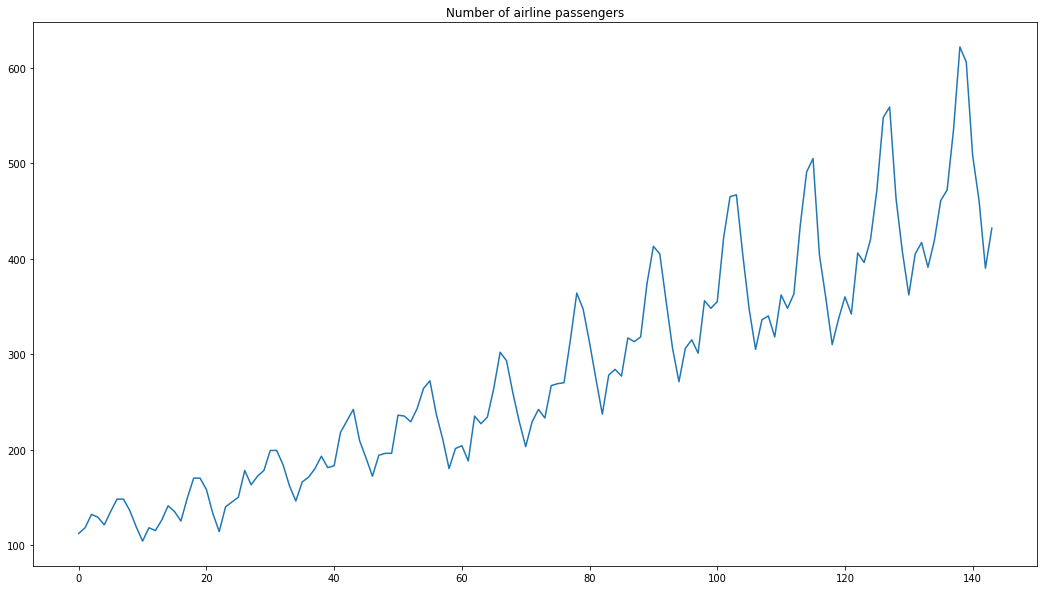

In [7]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), passengers)
plt.title(airline.name)
plt.show()

## NaN generator

In [8]:
np.random.seed(42)
na_idx = np.random.choice(len(passengers),size=20, replace= False)

In [9]:
na_idx

array([117,  19,  82,  97,  56,  12, 132,  65,  66,  18,  51,  78,  94,
       133, 100,  64,  27,  69, 125,  73])

In [10]:
passengers[na_idx] = np.nan

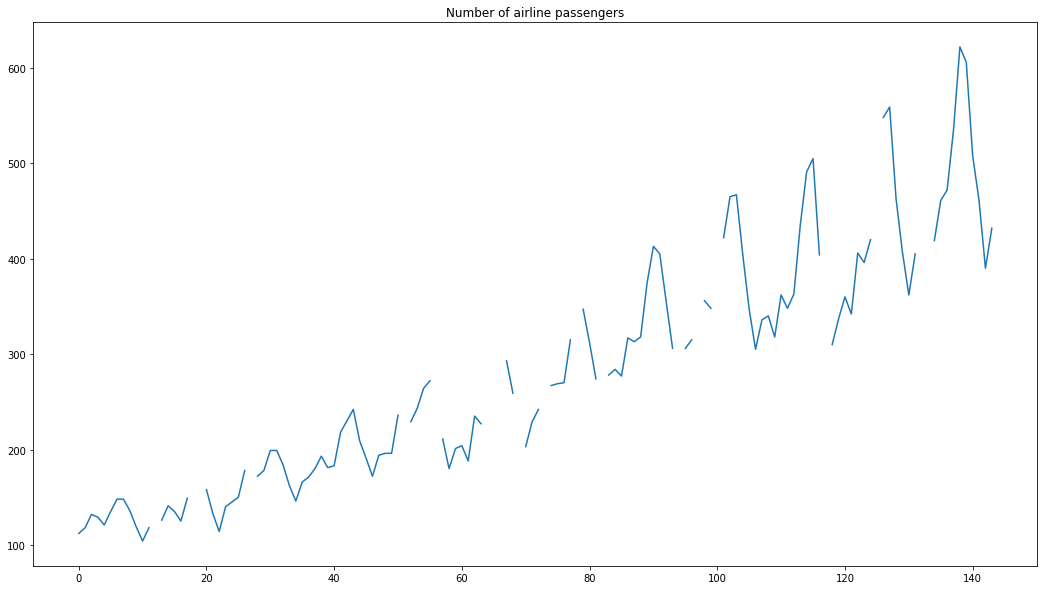

In [11]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), passengers)
plt.title(airline.name)
plt.show()

## sktime Imputer

[sktime](https://www.sktime.org/en/latest/index.html) is an unified framework for machine learning with time series.
It contains a mudule *impute* with different methods.

### method: drift

In [12]:
X = pd.Series(passengers)

In [13]:
driftImputer = Imputer(method="drift")

In [14]:
X_drift = driftImputer.fit_transform(X)

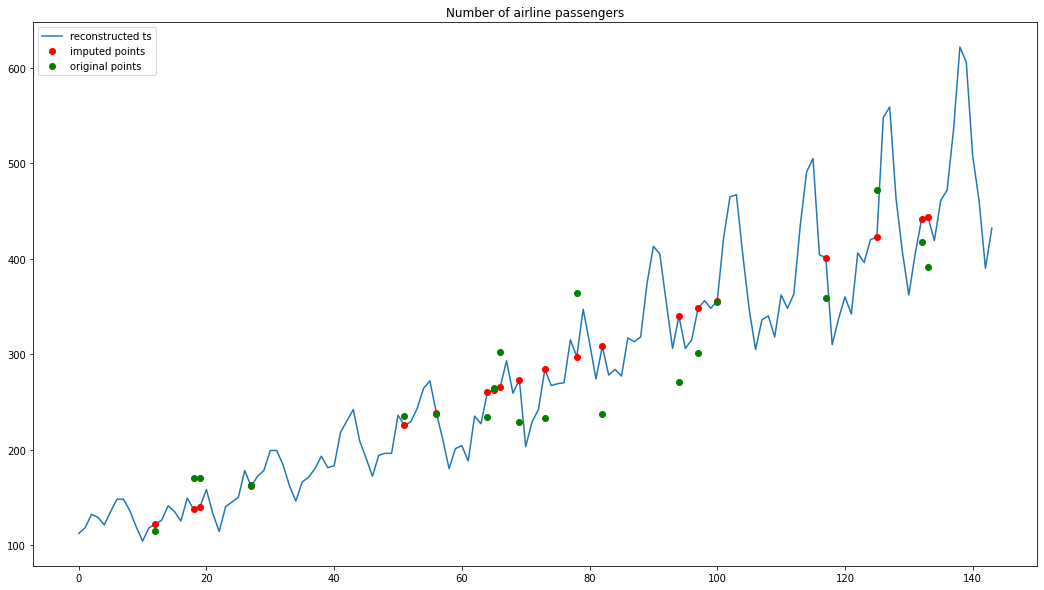

In [15]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), X_drift.values)
plt.plot(na_idx, X_drift[na_idx].values, 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

### method: linear

In [16]:
linearImputer = Imputer(method="linear")

In [17]:
X_linear = linearImputer.fit_transform(X)

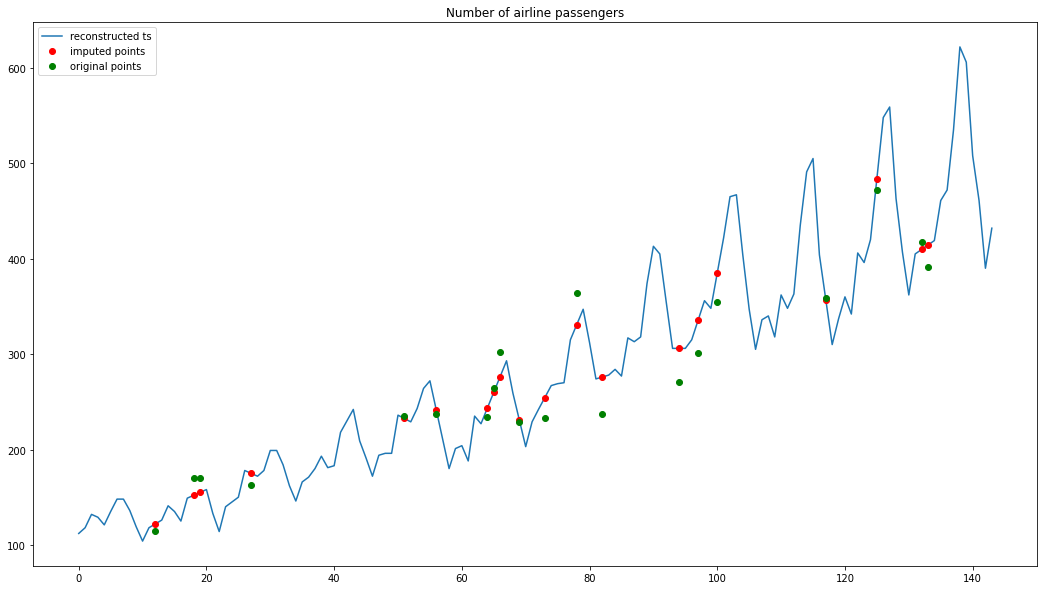

In [18]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), X_linear.values)
plt.plot(na_idx, X_linear[na_idx].values, 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

### method: nearest

In [19]:
nearestImputer = Imputer(method="nearest")

In [20]:
X_nearest = nearestImputer.fit_transform(X)

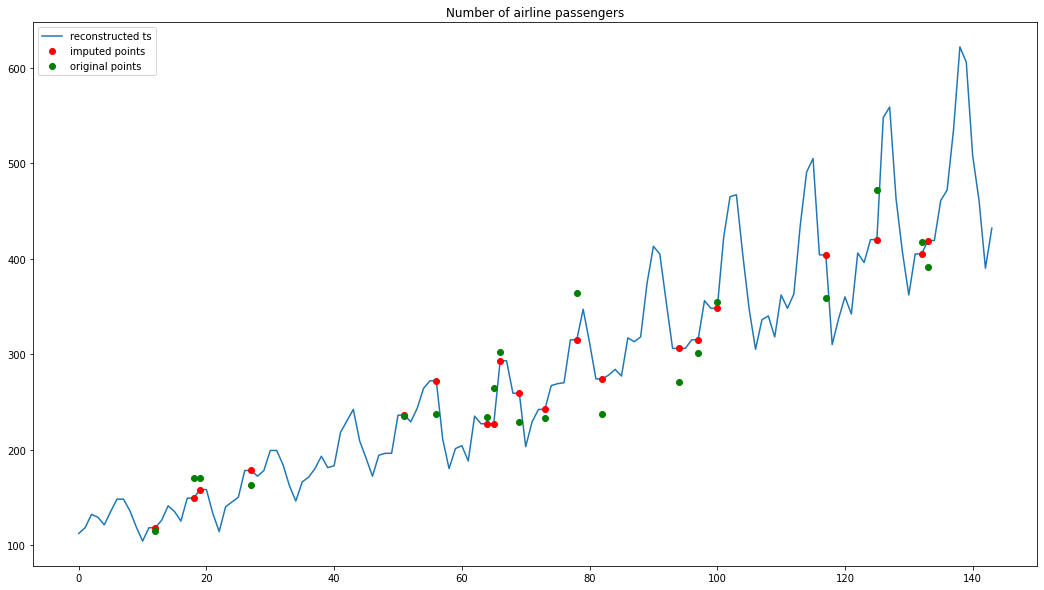

In [21]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), X_nearest.values)
plt.plot(na_idx, X_nearest[na_idx].values, 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

### method: mean

In [22]:
meanImputer = Imputer(method="mean")

In [23]:
X_mean = meanImputer.fit_transform(X)

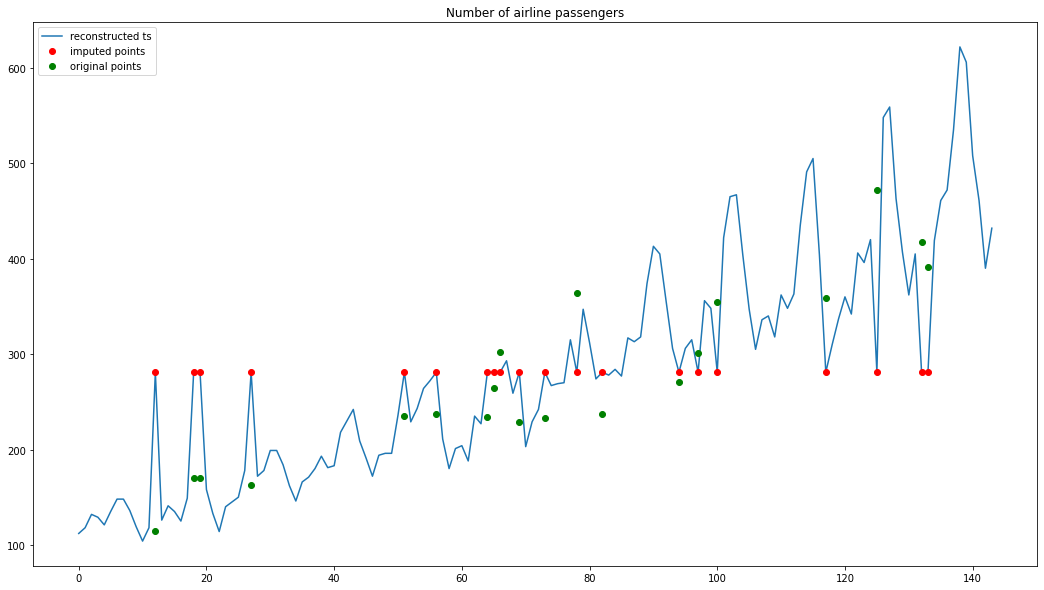

In [24]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers)), X_mean.values)
plt.plot(na_idx, X_mean[na_idx].values, 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

## pynuTS tsImputer

* with maximun distance recommended
* with custom distance

In [25]:
distance = maximum_distance_recommended(passengers)

the maximum range recommended for the 'm_avg' parameter is 2 


In [26]:
imputer = TsImputer(m_avg= distance, copy= True)
imputer1 = TsImputer(m_avg= 1, copy= True)

In [27]:
passengers_new = imputer.fit_transform(passengers)
passengers_new1 = imputer1.fit_transform(passengers)

100%|██████████| 20/20 [00:00<00:00, 29852.70it/s]


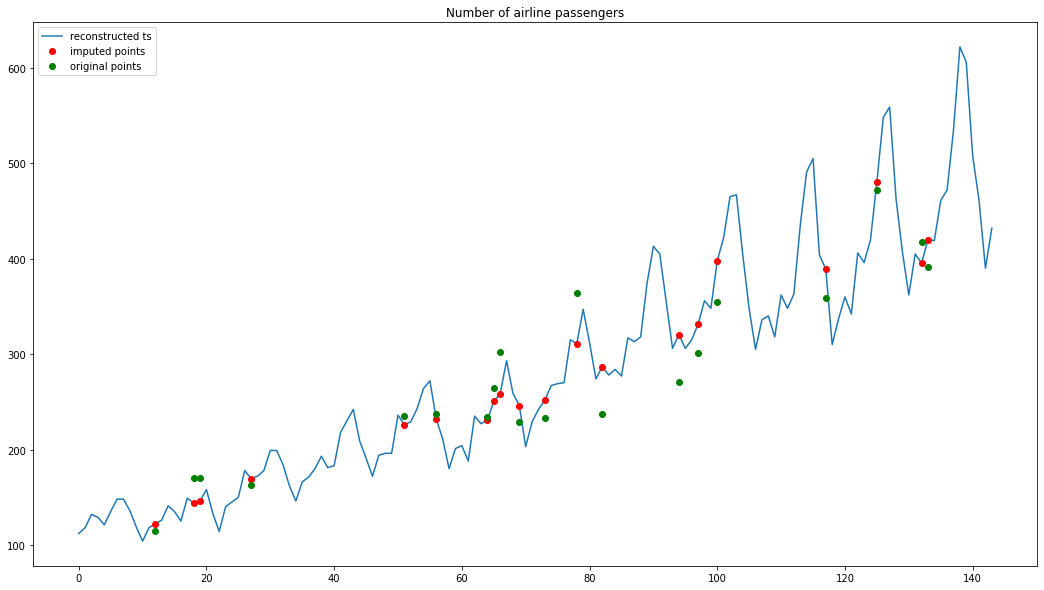

In [28]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers_new)), passengers_new)
plt.plot(na_idx, passengers_new[na_idx], 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

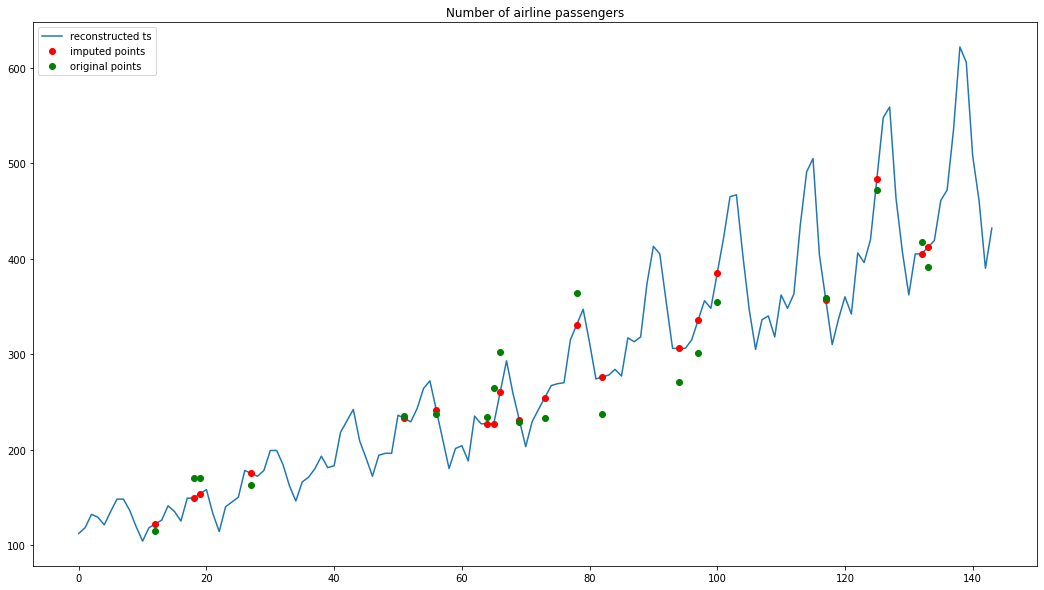

In [29]:
plt.figure(figsize=(18,10))
plt.plot(range(0,len(passengers_new)), passengers_new1)
plt.plot(na_idx, passengers_new1[na_idx], 'ro')
plt.plot(na_idx, airline[na_idx].values, 'go')
plt.legend(["reconstructed ts", "imputed points", "original points"])
plt.title(airline.name)
plt.show()

## Evaluation



In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
print("MAE between original ts and drift imputer: ", mean_absolute_error(airline.values, X_drift.values))
print("\n")
print("MAE between original ts and linear imputer: ", mean_absolute_error(airline.values, X_linear.values))
print("\n")
print("MAE between original ts and nearest imputer: ", mean_absolute_error(airline.values, X_nearest.values))
print("\n")
print("MAE between original ts and mean imputer: ", mean_absolute_error(airline.values, X_mean.values))
print("\n")
print("MAE between original ts and pynuTS imputer with max distance recommended: ", mean_absolute_error(airline.values, passengers_new))
print("\n")
print("MAE between original ts and pynuTS imputer with custom distance: ", mean_absolute_error(airline.values, passengers_new1))

MAE between original ts and drift imputer:  4.614092349221658


MAE between original ts and linear imputer:  2.344907407407407


MAE between original ts and nearest imputer:  3.1805555555555554


MAE between original ts and mean imputer:  10.604166666666666


MAE between original ts and pynuTS imputer with max distance recommended:  3.3964120370370363


MAE between original ts and pynuTS imputer with custom distance:  2.71875


## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

Demo notebook by Marcello Morchio 2020

Forked repository https://github.com/mallibus/pynuTS